# Closest Pair of Points in 2D Space
## Using Mars Craters Dataset

This notebook implements two algorithms to find the closest pair of craters on Mars:
1. **Brute Force Approach** - O(n²) time complexity
2. **Divide and Conquer Approach** - O(n log n) time complexity

We'll use longitude and latitude as x and y coordinates for a simplified 2D implementation.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Mars Craters Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Mars Crater info.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (384343, 10)

First few rows:


,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0
5,01-000005,,68.547,137.849,72.66,0.19,,,,0
6,01-000006,,69.492,169.751,70.11,0.10,,,,0
7,01-000007,,78.716,-87.249,63.57,0.05,,,,0
8,01-000008,,75.539,13.829,58.40,0.11,Rd,,,0
9,01-000009,,69.371,75.147,55.24,0.00,,,,0


In [3]:
# Check for missing values in latitude and longitude
print("Missing values:")
print(df[['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE']].isnull().sum())

# Get basic statistics
print("\nBasic statistics:")
df[['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE']].describe()

Missing values:
LATITUDE_CIRCLE_IMAGE     0
LONGITUDE_CIRCLE_IMAGE    0
dtype: int64

Basic statistics:


,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE
count,384343.000000,384343.000000
mean,-7.199209,10.128021
std,33.608966,96.641592
min,-86.700000,-179.997000
25%,-30.935000,-58.829000
50%,-10.079000,12.740000
75%,17.222500,89.275500
max,85.702000,179.997000


## 3. Define the Point Class and Distance Function

In [4]:
class Point:
    """Represents a point in 2D space with x and y coordinates"""
    
    def __init__(self, x, y, crater_id=None, crater_name=None):
        self.x = x  # longitude
        self.y = y  # latitude
        self.crater_id = crater_id
        self.crater_name = crater_name if crater_name and crater_name.strip() else "Unnamed"
    
    def __repr__(self):
        return f"Point(x={self.x:.3f}, y={self.y:.3f}, id={self.crater_id}, name={self.crater_name})"


def distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    dx = p1.x - p2.x
    dy = p1.y - p2.y
    return sqrt(dx * dx + dy * dy)


print("Point class and distance function defined!")

Point class and distance function defined!


## 4. Brute Force Algorithm - O(n²)

In [5]:
def closest_pair_brute_force(points):
    """
    Brute force approach to find closest pair of points.
    Time Complexity: O(n²)
    Space Complexity: O(1)
    
    Args:
        points: List of Point objects
    
    Returns:
        tuple: (min_distance, point1, point2, comparisons)
    """
    n = len(points)
    if n < 2:
        return None, None, None, 0
    
    min_dist = float('inf')
    closest_pair = (None, None)
    comparisons = 0
    
    # Check all pairs
    for i in range(n):
        for j in range(i + 1, n):
            comparisons += 1
            dist = distance(points[i], points[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (points[i], points[j])
    
    return min_dist, closest_pair[0], closest_pair[1], comparisons


print("Brute force algorithm implemented!")

Brute force algorithm implemented!


## 5a. Divide and Conquer Algorithm - O(n log n)

In [6]:
def strip_closest(strip, d, comparisons):
    """
    Find the closest points in a strip of width 2*d.
    
    Args:
        strip: List of points sorted by y-coordinate
        d: Current minimum distance
        comparisons: Counter for number of comparisons
    
    Returns:
        tuple: (min_distance, point1, point2, updated_comparisons)
    """
    min_dist = d
    closest_pair = (None, None)
    
    # Sort strip by y-coordinate
    strip.sort(key=lambda point: point.y)
    
    # Check points in strip
    for i in range(len(strip)):
        j = i + 1
        while j < len(strip) and (strip[j].y - strip[i].y) < min_dist:
            comparisons += 1
            dist = distance(strip[i], strip[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (strip[i], strip[j])
            j += 1
    
    return min_dist, closest_pair[0], closest_pair[1], comparisons


def closest_pair_recursive(points_x, points_y, comparisons):
    """
    Recursive helper function for divide and conquer approach.
    
    Args:
        points_x: Points sorted by x-coordinate
        points_y: Points sorted by y-coordinate
        comparisons: Counter for number of comparisons
    
    Returns:
        tuple: (min_distance, point1, point2, updated_comparisons)
    """
    n = len(points_x)
    
    # Use brute force for small inputs
    if n <= 3:
        # Return brute force result but ADD its comparisons to our running total
        bf_dist, bf_p1, bf_p2, bf_comp = closest_pair_brute_force(points_x)
        return bf_dist, bf_p1, bf_p2, comparisons + bf_comp
    
    # Divide points into two halves
    mid = n // 2
    mid_point = points_x[mid]
    
    # Split points by x-coordinate
    left_x = points_x[:mid]
    right_x = points_x[mid:]
    
    # Split points_y into left and right based on mid point
    left_y = [p for p in points_y if p.x <= mid_point.x]
    right_y = [p for p in points_y if p.x > mid_point.x]
    
    # Handle case where all points have same x-coordinate
    if len(left_y) == 0:
        left_y = points_y[:mid]
        right_y = points_y[mid:]
    
    # Recursively find closest pairs in both halves
    left_dist, left_p1, left_p2, comparisons = closest_pair_recursive(left_x, left_y, comparisons)
    right_dist, right_p1, right_p2, comparisons = closest_pair_recursive(right_x, right_y, comparisons)
    
    # Find the smaller distance
    if left_dist < right_dist:
        d = left_dist
        closest_pair = (left_p1, left_p2)
    else:
        d = right_dist
        closest_pair = (right_p1, right_p2)
    
    # Build strip array for points close to dividing line
    strip = [p for p in points_y if abs(p.x - mid_point.x) < d]
    
    # Find closest points in strip
    strip_dist, strip_p1, strip_p2, comparisons = strip_closest(strip, d, comparisons)
    
    # Return the overall closest pair
    if strip_dist < d:
        return strip_dist, strip_p1, strip_p2, comparisons
    else:
        return d, closest_pair[0], closest_pair[1], comparisons


def closest_pair_divide_conquer(points):
    """
    Divide and conquer approach to find closest pair of points.
    Time Complexity: O(n log n)
    Space Complexity: O(n)
    
    Args:
        points: List of Point objects
    
    Returns:
        tuple: (min_distance, point1, point2, comparisons)
    """
    if len(points) < 2:
        return None, None, None, 0
    
    # Create sorted copies
    points_x = sorted(points, key=lambda p: p.x)
    points_y = sorted(points, key=lambda p: p.y)
    
    return closest_pair_recursive(points_x, points_y, 0)


print("Divide and conquer algorithm implemented!")

Divide and conquer algorithm implemented!


## 5b. Top-K Closest Pairs Algorithm - O(n log n * k log k)

In [7]:
import heapq

def merge_top_k_pairs(pairs1, pairs2, k):
    """
    Merge two lists of top-k pairs and return the combined top-k.
    
    Args:
        pairs1: List of (distance, point1, point2) tuples
        pairs2: List of (distance, point1, point2) tuples
        k: Number of top pairs to keep
    
    Returns:
        List of top-k closest pairs
    """
    combined = pairs1 + pairs2
    # Sort by distance and keep top k
    combined.sort(key=lambda x: x[0])
    return combined[:k]


def strip_closest_top_k(strip, d, k, current_top_k):
    """
    Find the top-k closest points in a strip of width 2*d.
    
    Args:
        strip: List of points sorted by y-coordinate
        d: Current kth minimum distance
        k: Number of top pairs to find
        current_top_k: Current list of top-k pairs
    
    Returns:
        List of top-k closest pairs from strip
    """
    # Sort strip by y-coordinate
    strip.sort(key=lambda point: point.y)
    
    # Collect all pairs in strip with distance < d
    strip_pairs = []
    
    for i in range(len(strip)):
        j = i + 1
        while j < len(strip) and (strip[j].y - strip[i].y) < d:
            dist = distance(strip[i], strip[j])
            if dist < d:
                if(((dist, strip[i], strip[j]) in current_top_k) or ((dist, strip[j], strip[i]) in current_top_k)):
                    pass
                else:
                    strip_pairs.append((dist, strip[i], strip[j]))
            j += 1
    
    # Merge with current top-k and return top-k
    all_pairs = current_top_k + strip_pairs
    all_pairs.sort(key=lambda x: x[0])
    return all_pairs[:k]


def closest_k_pairs_recursive(points_x, points_y, k):
    """
    Recursive helper function for top-k divide and conquer approach.
    
    Args:
        points_x: Points sorted by x-coordinate
        points_y: Points sorted by y-coordinate
        k: Number of top pairs to find
    
    Returns:
        List of top-k closest pairs as (distance, point1, point2) tuples
    """
    n = len(points_x)
    
    # Use brute force for small inputs
    if n <= 3:
        pairs = []
        for i in range(n):
            for j in range(i + 1, n):
                dist = distance(points_x[i], points_x[j])
                pairs.append((dist, points_x[i], points_x[j]))
        pairs.sort(key=lambda x: x[0])
        return pairs[:k]
    
    # Divide points into two halves
    mid = n // 2
    mid_point = points_x[mid]
    
    # Split points by x-coordinate
    left_x = points_x[:mid]
    right_x = points_x[mid:]
    
    # Split points_y into left and right based on mid point
    left_y = [p for p in points_y if p.x <= mid_point.x]
    right_y = [p for p in points_y if p.x > mid_point.x]
    
    # Handle case where all points have same x-coordinate
    if len(left_y) == 0:
        left_y = points_y[:mid]
        right_y = points_y[mid:]
    
    # Recursively find top-k closest pairs in both halves
    left_pairs = closest_k_pairs_recursive(left_x, left_y, k)
    right_pairs = closest_k_pairs_recursive(right_x, right_y, k)
    
    # Merge the two lists to get top-k from both sides
    current_top_k = merge_top_k_pairs(left_pairs, right_pairs, k)
    
    # Get the kth smallest distance
    if len(current_top_k) >= k:
        d = current_top_k[k-1][0]
    else:
        d = current_top_k[-1][0] if current_top_k else float('inf')
    
    # Build strip array for points close to dividing line
    strip = [p for p in points_y if abs(p.x - mid_point.x) < d]
    
    # Find top-k closest points in strip
    strip_top_k = strip_closest_top_k(strip, d, k, current_top_k)
    
    return strip_top_k[:k]


def closest_k_pairs_divide_conquer(points, k):
    """
    Divide and conquer approach to find top-k closest pairs of points.
    Time Complexity: O(n log n * k log k)
    Space Complexity: O(n + k)
    
    Args:
        points: List of Point objects
        k: Number of top pairs to find
    
    Returns:
        List of top-k closest pairs as (distance, point1, point2) tuples
    """
    if len(points) < 2:
        return []
    
    # Create sorted copies
    points_x = sorted(points, key=lambda p: p.x)
    points_y = sorted(points, key=lambda p: p.y)
    
    return closest_k_pairs_recursive(points_x, points_y, k)


print("Top-K closest pairs algorithm implemented!")

Top-K closest pairs algorithm implemented!


## 6. Prepare Data from Mars Craters Dataset

In [8]:
# Remove rows with missing latitude or longitude
df_clean = df.dropna(subset=['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE'])

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} rows with missing coordinates")

Original dataset size: 384343
Cleaned dataset size: 384343
Removed 0 rows with missing coordinates


In [9]:
# Convert to Point objects
def create_points_from_dataframe(df, num_points=None):
    """
    Convert dataframe rows to Point objects.
    
    Args:
        df: DataFrame with crater data
        num_points: Number of points to use (None for all)
    
    Returns:
        List of Point objects
    """
    if num_points:
        df = df.head(num_points)
    
    points = []
    for _, row in df.iterrows():
        point = Point(
            x=row['LONGITUDE_CIRCLE_IMAGE'],
            y=row['LATITUDE_CIRCLE_IMAGE'],
            crater_id=row['CRATER_ID'],
            crater_name=row['CRATER_NAME']
        )
        points.append(point)
    
    return points


print("Data preparation function defined!")

Data preparation function defined!


## 7a. Test with Small Sample (100 craters)

In [10]:
# Test with 100 craters
sample_size = 100
sample_points = create_points_from_dataframe(df_clean, sample_size)

print(f"Testing with {len(sample_points)} craters")
print(f"\nFirst 5 points:")
for i, p in enumerate(sample_points[:5], 1):
    print(f"{i}. {p}")

Testing with 100 craters

First 5 points:
1. Point(x=108.746, y=84.367, id=01-000000, name=Unnamed)
2. Point(x=164.464, y=72.760, id=01-000001, name=Korolev)
3. Point(x=-27.240, y=69.244, id=01-000002, name=Unnamed)
4. Point(x=160.575, y=70.107, id=01-000003, name=Unnamed)
5. Point(x=95.617, y=77.996, id=01-000004, name=Unnamed)


In [11]:
# Run Brute Force
print("=" * 70)
print("BRUTE FORCE ALGORITHM")
print("=" * 70)

start_time = time.time()
bf_dist, bf_p1, bf_p2, bf_comp = closest_pair_brute_force(sample_points)
bf_time = time.time() - start_time

print(f"\nClosest Distance: {bf_dist:.6f} degrees")
print(f"\nPoint 1:")
print(f"  ID: {bf_p1.crater_id}")
print(f"  Name: {bf_p1.crater_name}")
print(f"  Coordinates: ({bf_p1.x:.3f}°, {bf_p1.y:.3f}°)")
print(f"\nPoint 2:")
print(f"  ID: {bf_p2.crater_id}")
print(f"  Name: {bf_p2.crater_name}")
print(f"  Coordinates: ({bf_p2.x:.3f}°, {bf_p2.y:.3f}°)")
print(f"\nClosest Pair IDs: ({bf_p1.crater_id}, {bf_p2.crater_id})")
print(f"\nComparisons: {bf_comp:,}")
print(f"Time: {bf_time:.6f} seconds")

BRUTE FORCE ALGORITHM

Closest Distance: 0.182222 degrees

Point 1:
  ID: 01-000067
  Name: Unnamed
  Coordinates: (-122.242°, 84.969°)

Point 2:
  ID: 01-000077
  Name: Unnamed
  Coordinates: (-122.064°, 85.008°)

Closest Pair IDs: (01-000067, 01-000077)

Comparisons: 4,950
Time: 0.001002 seconds


In [12]:
# Run Divide and Conquer
print("=" * 70)
print("DIVIDE AND CONQUER ALGORITHM")
print("=" * 70)

start_time = time.time()
dc_dist, dc_p1, dc_p2, dc_comp = closest_pair_divide_conquer(sample_points)
dc_time = time.time() - start_time

print(f"\nClosest Distance: {dc_dist:.6f} degrees")
print(f"\nPoint 1:")
print(f"  ID: {dc_p1.crater_id}")
print(f"  Name: {dc_p1.crater_name}")
print(f"  Coordinates: ({dc_p1.x:.3f}°, {dc_p1.y:.3f}°)")
print(f"\nPoint 2:")
print(f"  ID: {dc_p2.crater_id}")
print(f"  Name: {dc_p2.crater_name}")
print(f"  Coordinates: ({dc_p2.x:.3f}°, {dc_p2.y:.3f}°)")
print(f"\nClosest Pair IDs: ({dc_p1.crater_id}, {dc_p2.crater_id})")
print(f"\nComparisons: {dc_comp:,}")
print(f"Time: {dc_time:.6f} seconds")

DIVIDE AND CONQUER ALGORITHM

Closest Distance: 0.182222 degrees

Point 1:
  ID: 01-000067
  Name: Unnamed
  Coordinates: (-122.242°, 84.969°)

Point 2:
  ID: 01-000077
  Name: Unnamed
  Coordinates: (-122.064°, 85.008°)

Closest Pair IDs: (01-000067, 01-000077)

Comparisons: 112
Time: 0.000000 seconds


In [13]:
# Compare results
print("=" * 70)
print("COMPARISON")
print("=" * 70)

print(f"\nDistance Match: {abs(bf_dist - dc_dist) < 1e-9}")
print(f"\nBrute Force:")
print(f"  Comparisons: {bf_comp:,}")
print(f"  Time: {bf_time:.6f} seconds")
print(f"\nDivide & Conquer:")
print(f"  Comparisons: {dc_comp:,}")
print(f"  Time: {dc_time:.6f} seconds")
print(f"\nSpeedup:")
print(f"  Comparisons reduced by: {(1 - dc_comp/bf_comp)*100:.2f}%")
print(f"  Time speedup: {bf_time/dc_time:.2f}x faster" if dc_time > 0 else "  Time too small to measure")

COMPARISON

Distance Match: True

Brute Force:
  Comparisons: 4,950
  Time: 0.001002 seconds

Divide & Conquer:
  Comparisons: 112
  Time: 0.000000 seconds

Speedup:
  Comparisons reduced by: 97.74%
  Time too small to measure


## 7b. Test Top-K Closest Pairs Algorithm

In [14]:
# Test Top-K algorithm with k=5
k_value = 5

print("=" * 70)
print(f"TOP-{k_value} CLOSEST PAIRS ALGORITHM")
print("=" * 70)

start_time = time.time()
top_k_pairs = closest_k_pairs_divide_conquer(sample_points, k_value)
topk_time = time.time() - start_time

print(f"\nFound {len(top_k_pairs)} closest pairs:")
print(f"\n{'Rank':<6} {'Distance':<15} {'Crater 1':<30} {'Crater 2':<30}")
print("=" * 80)

for i, (dist, p1, p2) in enumerate(top_k_pairs, 1):
    crater1_info = f"{p1.crater_name} ({p1.crater_id})"
    crater2_info = f"{p2.crater_name} ({p2.crater_id})"
    print(f"{i:<6} {dist:<15.6f} {crater1_info:<30} {crater2_info:<30}")

print(f"\nTime taken: {topk_time:.6f} seconds")

# Verify: Check if the closest pair matches the single pair algorithm
if top_k_pairs:
    topk_closest_dist = top_k_pairs[0][0]
    topk_p1 = top_k_pairs[0][1]
    topk_p2 = top_k_pairs[0][2]
    
    print(f"\n{'Verification:'}")
    print(f"  Top-1 from Top-K algorithm: {topk_p1.crater_id}, {topk_p2.crater_id} (dist: {topk_closest_dist:.6f})")
    print(f"  Closest from D&C algorithm: {dc_p1.crater_id}, {dc_p2.crater_id} (dist: {dc_dist:.6f})")
    
    topk_set = {topk_p1.crater_id, topk_p2.crater_id}
    dc_set = {dc_p1.crater_id, dc_p2.crater_id}
    
    if topk_set == dc_set and abs(topk_closest_dist - dc_dist) < 1e-9:
        print(f"  ✓ Results match!")
    else:
        print(f"  ✗ Results don't match!")

TOP-5 CLOSEST PAIRS ALGORITHM

Found 5 closest pairs:

Rank   Distance        Crater 1                       Crater 2                      
1      0.182222        Unnamed (01-000067)            Unnamed (01-000077)           
2      0.761411        Unnamed (01-000034)            Unnamed (01-000072)           
3      0.888852        Unnamed (01-000059)            Unnamed (01-000044)           
4      0.967326        Unnamed (01-000053)            Unnamed (01-000009)           
5      0.999165        Unnamed (01-000052)            Unnamed (01-000097)           

Time taken: 0.001000 seconds

Verification:
  Top-1 from Top-K algorithm: 01-000067, 01-000077 (dist: 0.182222)
  Closest from D&C algorithm: 01-000067, 01-000077 (dist: 0.182222)
  ✓ Results match!


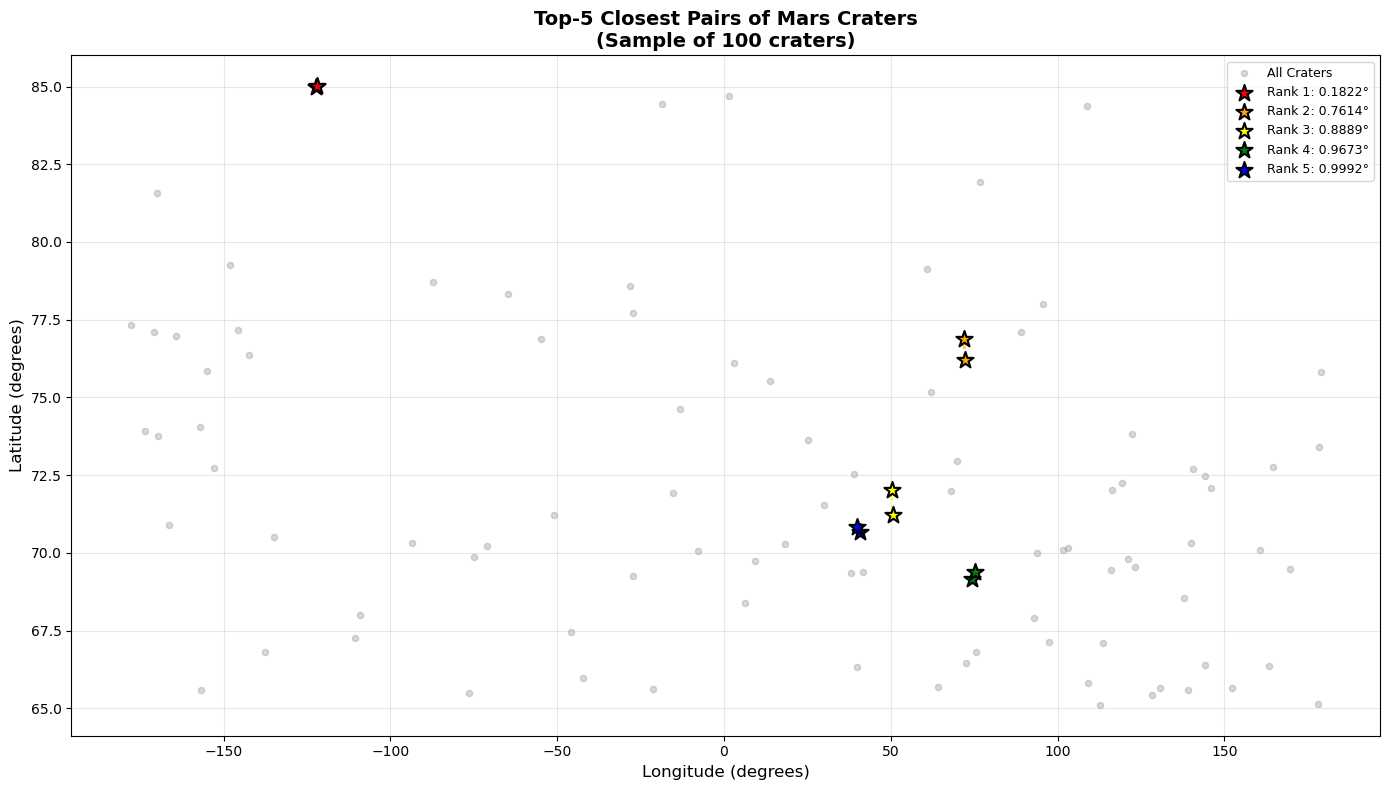

Visualization saved as 'top_5_closest_pairs.png'


In [15]:
# Visualize Top-K closest pairs
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all craters
x_coords = [p.x for p in sample_points]
y_coords = [p.y for p in sample_points]
ax.scatter(x_coords, y_coords, alpha=0.3, s=20, c='gray', label='All Craters')

# Define colors for different ranks
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'cyan', 'magenta']

# Highlight top-k pairs with different colors
for i, (dist, p1, p2) in enumerate(top_k_pairs[:min(k_value, len(top_k_pairs))]):
    color = colors[i % len(colors)]
    ax.scatter([p1.x, p2.x], [p1.y, p2.y], s=150, c=color, marker='*', 
               edgecolors='black', linewidths=1.5, label=f'Rank {i+1}: {dist:.4f}°', zorder=5)
    ax.plot([p1.x, p2.x], [p1.y, p2.y], '--', linewidth=2, alpha=0.6, color=color, zorder=4)

ax.set_xlabel('Longitude (degrees)', fontsize=12)
ax.set_ylabel('Latitude (degrees)', fontsize=12)
ax.set_title(f'Top-{k_value} Closest Pairs of Mars Craters\n(Sample of {len(sample_points)} craters)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'top_{k_value}_closest_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Visualization saved as 'top_{k_value}_closest_pairs.png'")

## 8a. Performance Analysis - Compare Different Sizes

In [16]:
# Test with different sizes
test_sizes = [50, 100, 200, 500, 1000, 2000, 5000]

results = {
    'size': [],
    'bf_time': [],
    'dc_time': [],
    'bf_comparisons': [],
    'dc_comparisons': [],
    'bf_pair_ids': [],
    'dc_pair_ids': []
}

print("Running performance tests...\n")
print(f"{'Size':<6} {'BF Time':<10} {'DC Time':<10} {'BF Comp':<15} {'DC Comp':<10} {'BF Pair IDs':<25} {'DC Pair IDs':<25} {'Match':<8}")
print("="*120)

for size in test_sizes:
    if size > len(df_clean):
        print(f"Skipping size {size} (exceeds dataset size)")
        continue
    
    points = create_points_from_dataframe(df_clean, size)
    
    # Brute Force
    start = time.time()
    bf_dist, bf_p1, bf_p2, bf_comp = closest_pair_brute_force(points)
    bf_time = time.time() - start
    bf_pair_ids = f"({bf_p1.crater_id}, {bf_p2.crater_id})"
    
    # Divide and Conquer
    start = time.time()
    dc_dist, dc_p1, dc_p2, dc_comp = closest_pair_divide_conquer(points)
    dc_time = time.time() - start
    dc_pair_ids = f"({dc_p1.crater_id}, {dc_p2.crater_id})"
    
    # Check if pairs match (accounting for order)
    bf_set = {bf_p1.crater_id, bf_p2.crater_id}
    dc_set = {dc_p1.crater_id, dc_p2.crater_id}
    pairs_match = "✓" if bf_set == dc_set else "✗"
    
    # Store results
    results['size'].append(size)
    results['bf_time'].append(bf_time)
    results['dc_time'].append(dc_time)
    results['bf_comparisons'].append(bf_comp)
    results['dc_comparisons'].append(dc_comp)
    results['bf_pair_ids'].append(bf_pair_ids)
    results['dc_pair_ids'].append(dc_pair_ids)
    
    print(f"{size:<6} {bf_time:<10.6f} {dc_time:<10.6f} {bf_comp:<15,} {dc_comp:<10,} {bf_pair_ids:<25} {dc_pair_ids:<25} {pairs_match:<8}")

print("\nPerformance analysis complete!")
print(f"\nAll pairs matched: {'Yes ✓' if all(results['bf_pair_ids'][i] == results['dc_pair_ids'][i] or set(results['bf_pair_ids'][i].strip('()').split(', ')) == set(results['dc_pair_ids'][i].strip('()').split(', ')) for i in range(len(results['size']))) else 'No ✗'}")

Running performance tests...

Size   BF Time    DC Time    BF Comp         DC Comp    BF Pair IDs               DC Pair IDs               Match   
50     0.001000   0.000000   1,225           56         (01-000029, 01-000046)    (01-000046, 01-000029)    ✓       
100    0.000998   0.000000   4,950           112        (01-000067, 01-000077)    (01-000067, 01-000077)    ✓       
200    0.003099   0.000000   19,900          229        (01-000067, 01-000077)    (01-000067, 01-000077)    ✓       
500    0.020204   0.001002   124,750         473        (01-000221, 01-000313)    (01-000313, 01-000221)    ✓       
1000   0.082110   0.002007   499,500         1,021      (01-000810, 01-000961)    (01-000810, 01-000961)    ✓       
2000   0.322141   0.004993   1,999,000       2,038      (01-001705, 01-001993)    (01-001705, 01-001993)    ✓       
5000   2.003243   0.013003   12,497,500      5,960      (01-001705, 01-001993)    (01-001705, 01-001993)    ✓       

Performance analysis complete!

A

## 8b. Performance Analysis - Compare Different K Values

In [17]:
# Test with fixed sample size of 1000 and varying k values
sample_size_k = 1000
k_values = [1, 5, 10, 20, 50, 100, 200, 500]

print(f"Preparing sample of {sample_size_k} craters for top-K testing...")
sample_1000_k = create_points_from_dataframe(df_clean, sample_size_k)
print(f"Sample ready with {len(sample_1000_k)} points\n")

k_results = {
    'k': [],
    'topk_time': [],
    'topk_pairs': []
}

print("Running Top-K Closest Pairs Performance Tests (Fixed n=1000, Variable k)...\n")
print(f"{'K Value':<10} {'Time (s)':<15} {'Pairs Found':<15}")
print("="*45)

for k in k_values:
    # Run Top-K Divide and Conquer
    start = time.time()
    top_k_pairs = closest_k_pairs_divide_conquer(sample_1000_k, k)
    topk_time = time.time() - start
    
    # Store results
    k_results['k'].append(k)
    k_results['topk_time'].append(topk_time)
    k_results['topk_pairs'].append(top_k_pairs)
    
    print(f"{k:<10} {topk_time:<15.6f} {len(top_k_pairs):<15}")

print("\n" + "="*45)
print("Top-K performance analysis complete!")

# Display detailed results for selected k values
display_k_values = [1, 5, 10, 20]

for i, k in enumerate(k_results['k']):
    if k in display_k_values:
        pairs = k_results['topk_pairs'][i]
        
        print("\n" + "=" * 100)
        print(f"TOP-{k} CLOSEST PAIRS - DETAILED RESULTS")
        print("=" * 100)
        print(f"\n{'Rank':<6} {'Distance':<15} {'Crater 1 ID':<15} {'Crater 1 Name':<25} {'Crater 2 ID':<15} {'Crater 2 Name':<25}")
        print("-" * 100)
        
        for rank, (dist, p1, p2) in enumerate(pairs[:min(10, len(pairs))], 1):
            print(f"{rank:<6} {dist:<15.8f} {p1.crater_id:<15} {p1.crater_name:<25} {p2.crater_id:<15} {p2.crater_name:<25}")
        
        if len(pairs) > 10:
            print(f"\n... and {len(pairs) - 10} more pairs ...")

print("\n" + "=" * 100)

Preparing sample of 1000 craters for top-K testing...
Sample ready with 1000 points

Running Top-K Closest Pairs Performance Tests (Fixed n=1000, Variable k)...

K Value    Time (s)        Pairs Found    
1          0.003001        1              
5          0.004893        5              
10         0.005001        10             
20         0.007098        20             
50         0.014005        50             
100        0.020002        100            
200        0.053817        200            
500        0.097707        500            

Top-K performance analysis complete!

TOP-1 CLOSEST PAIRS - DETAILED RESULTS

Rank   Distance        Crater 1 ID     Crater 1 Name             Crater 2 ID     Crater 2 Name            
----------------------------------------------------------------------------------------------------
1      0.05515433      01-000810       Unnamed                   01-000961       Unnamed                  

TOP-5 CLOSEST PAIRS - DETAILED RESULTS

Rank   Distance 

## 9. Visualize Performance Comparison

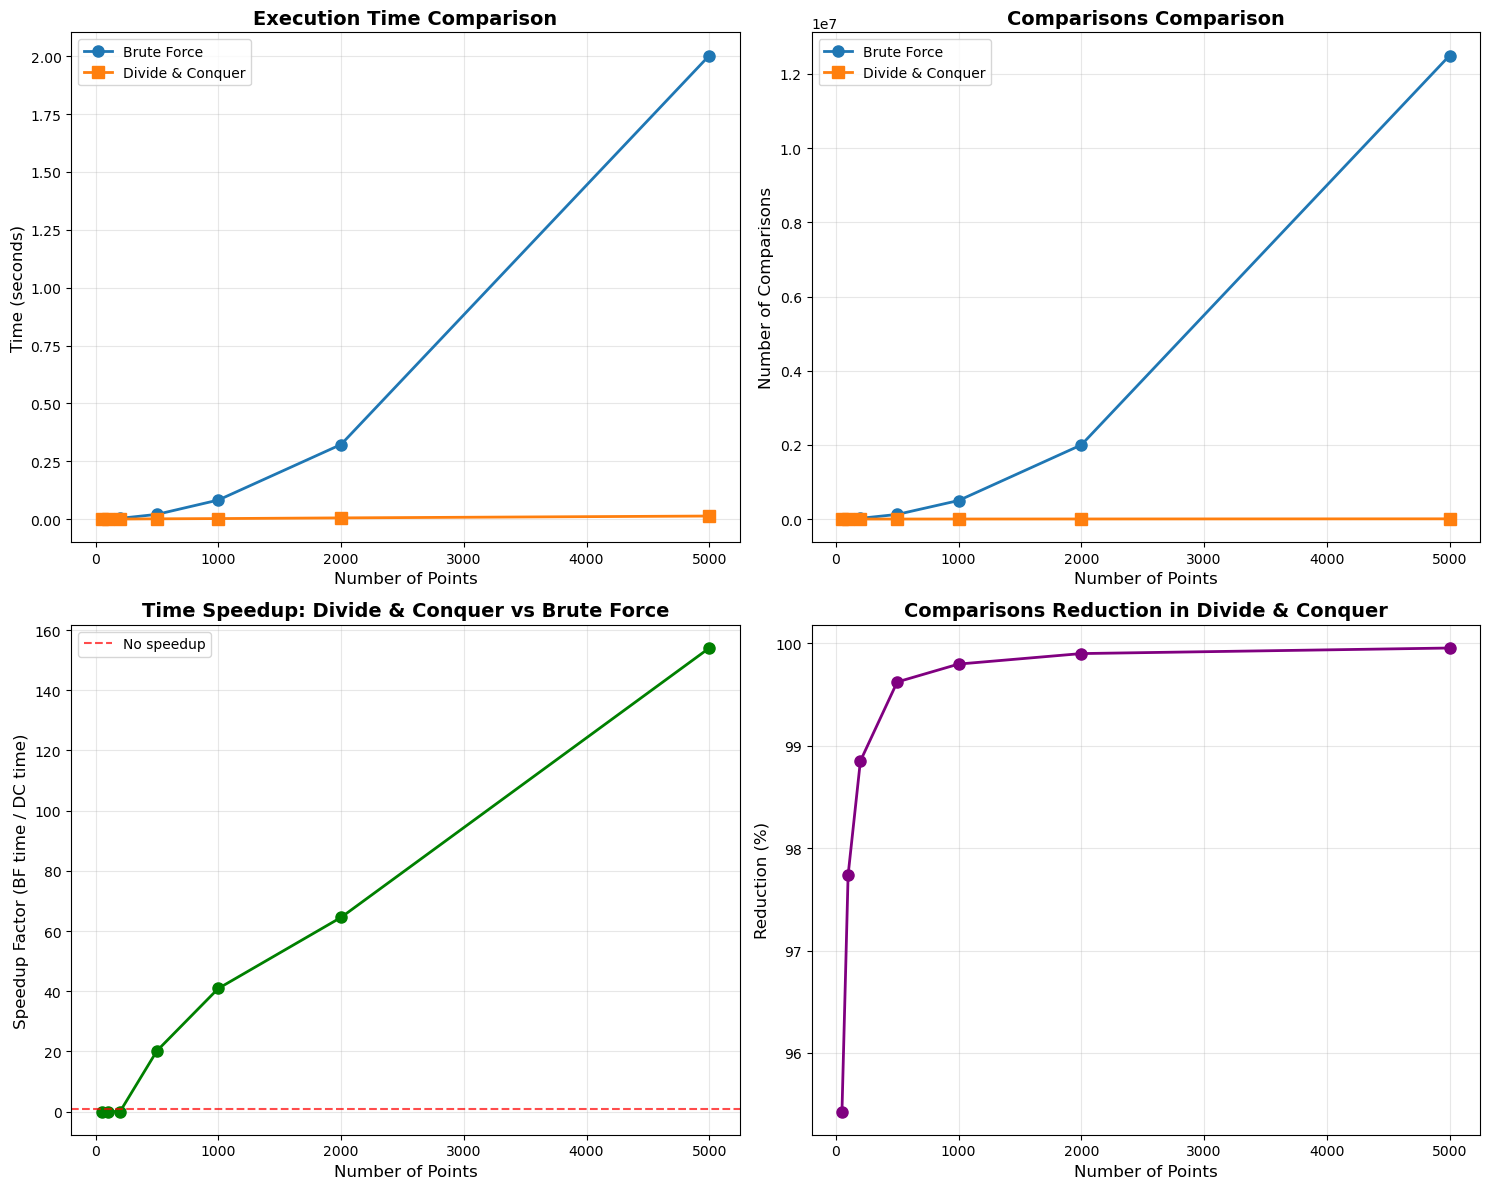

Performance visualization complete!


In [18]:
# Create performance plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Execution Time
axes[0, 0].plot(results['size'], results['bf_time'], 'o-', label='Brute Force', linewidth=2, markersize=8)
axes[0, 0].plot(results['size'], results['dc_time'], 's-', label='Divide & Conquer', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Points', fontsize=12)
axes[0, 0].set_ylabel('Time (seconds)', fontsize=12)
axes[0, 0].set_title('Execution Time Comparison', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Number of Comparisons
axes[0, 1].plot(results['size'], results['bf_comparisons'], 'o-', label='Brute Force', linewidth=2, markersize=8)
axes[0, 1].plot(results['size'], results['dc_comparisons'], 's-', label='Divide & Conquer', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Points', fontsize=12)
axes[0, 1].set_ylabel('Number of Comparisons', fontsize=12)
axes[0, 1].set_title('Comparisons Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Speedup Factor
speedup = [bf/dc if dc > 0 else 0 for bf, dc in zip(results['bf_time'], results['dc_time'])]
axes[1, 0].plot(results['size'], speedup, 'o-', color='green', linewidth=2, markersize=8)
axes[1, 0].axhline(y=1, color='red', linestyle='--', label='No speedup', alpha=0.7)
axes[1, 0].set_xlabel('Number of Points', fontsize=12)
axes[1, 0].set_ylabel('Speedup Factor (BF time / DC time)', fontsize=12)
axes[1, 0].set_title('Time Speedup: Divide & Conquer vs Brute Force', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Comparison Reduction
comp_reduction = [(bf-dc)/bf*100 for bf, dc in zip(results['bf_comparisons'], results['dc_comparisons'])]
axes[1, 1].plot(results['size'], comp_reduction, 'o-', color='purple', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Points', fontsize=12)
axes[1, 1].set_ylabel('Reduction (%)', fontsize=12)
axes[1, 1].set_title('Comparisons Reduction in Divide & Conquer', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Performance visualization complete!")

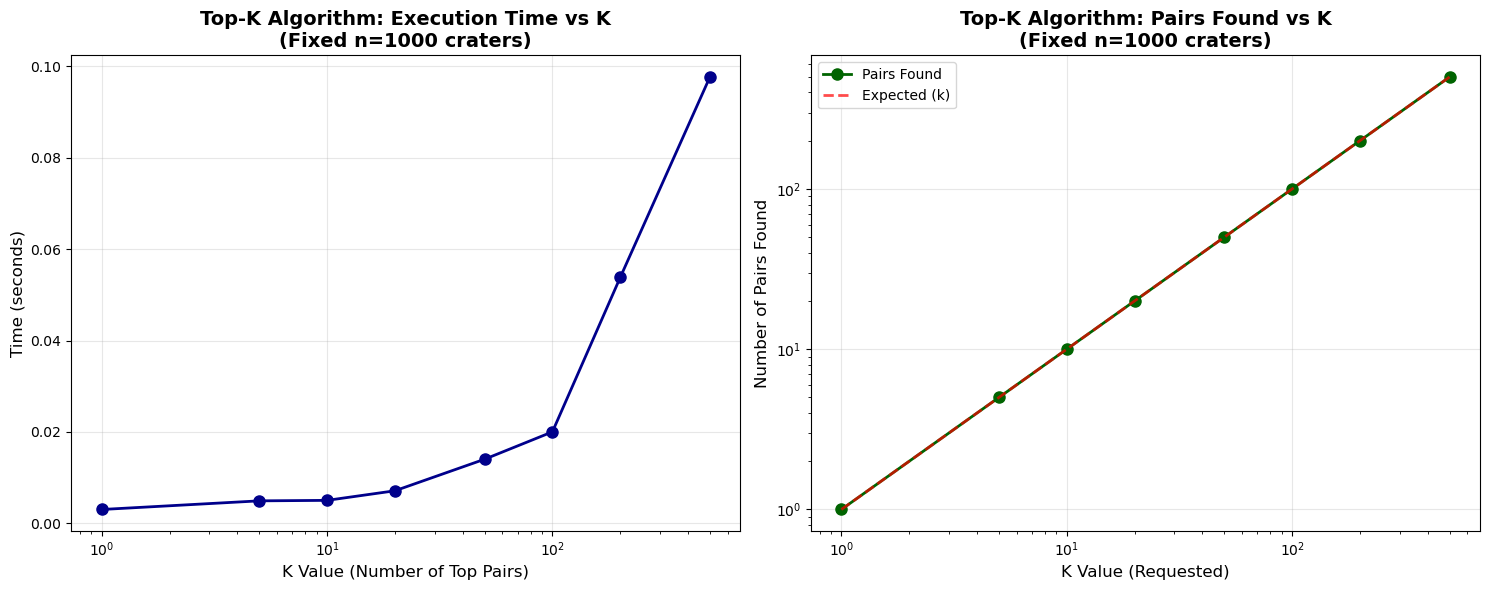

Top-K performance visualization complete!


In [19]:
# Create performance plots for Top-K algorithm with varying k values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Execution Time vs K
axes[0].plot(k_results['k'], k_results['topk_time'], 'o-', color='darkblue', linewidth=2, markersize=8)
axes[0].set_xlabel('K Value (Number of Top Pairs)', fontsize=12)
axes[0].set_ylabel('Time (seconds)', fontsize=12)
axes[0].set_title('Top-K Algorithm: Execution Time vs K\n(Fixed n=1000 craters)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Plot 2: Pairs Found vs K (should match k)
pairs_found = [len(pairs) for pairs in k_results['topk_pairs']]
axes[1].plot(k_results['k'], pairs_found, 'o-', color='darkgreen', linewidth=2, markersize=8, label='Pairs Found')
axes[1].plot(k_results['k'], k_results['k'], '--', color='red', linewidth=2, alpha=0.7, label='Expected (k)')
axes[1].set_xlabel('K Value (Requested)', fontsize=12)
axes[1].set_ylabel('Number of Pairs Found', fontsize=12)
axes[1].set_title('Top-K Algorithm: Pairs Found vs K\n(Fixed n=1000 craters)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.savefig('topk_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top-K performance visualization complete!")

## 10. Visualize Closest Pair on Mars Map

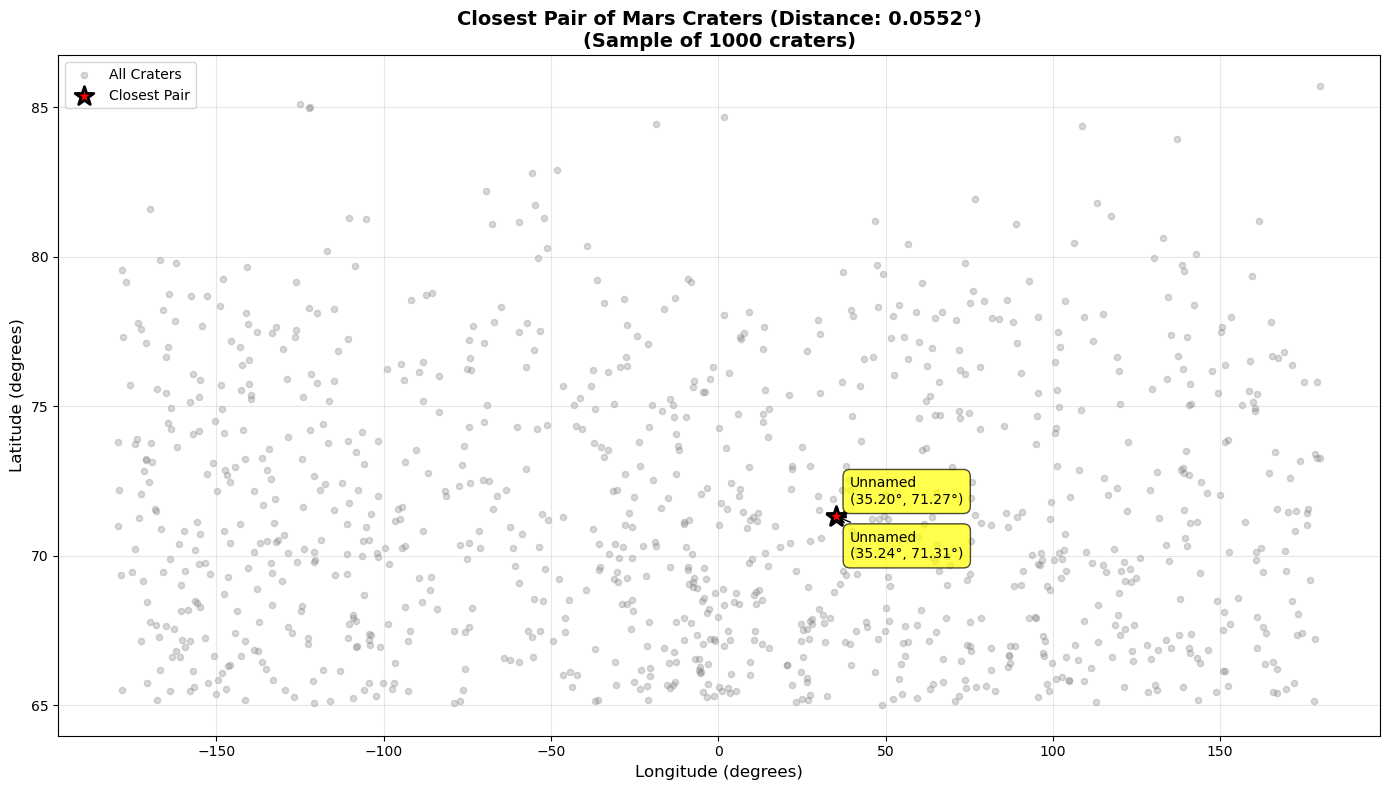


Closest pair found:
Crater 1: Unnamed at (35.198°, 71.274°)
Crater 2: Unnamed at (35.237°, 71.313°)
Distance: 0.055154 degrees


In [20]:
# Visualize the closest pair
sample_for_viz = create_points_from_dataframe(df_clean, 1000)
dist, p1, p2, _ = closest_pair_divide_conquer(sample_for_viz)

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all craters
x_coords = [p.x for p in sample_for_viz]
y_coords = [p.y for p in sample_for_viz]
ax.scatter(x_coords, y_coords, alpha=0.3, s=20, c='gray', label='All Craters')

# Highlight closest pair
ax.scatter([p1.x, p2.x], [p1.y, p2.y], s=200, c='red', marker='*', 
           edgecolors='black', linewidths=2, label='Closest Pair', zorder=5)

# Draw line between closest pair
ax.plot([p1.x, p2.x], [p1.y, p2.y], 'r--', linewidth=2, alpha=0.7, zorder=4)

# Add labels
ax.annotate(f'{p1.crater_name}\n({p1.x:.2f}°, {p1.y:.2f}°)', 
            xy=(p1.x, p1.y), xytext=(10, 10), textcoords='offset points',
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.annotate(f'{p2.crater_name}\n({p2.x:.2f}°, {p2.y:.2f}°)', 
            xy=(p2.x, p2.y), xytext=(10, -30), textcoords='offset points',
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.set_xlabel('Longitude (degrees)', fontsize=12)
ax.set_ylabel('Latitude (degrees)', fontsize=12)
ax.set_title(f'Closest Pair of Mars Craters (Distance: {dist:.4f}°)\n(Sample of 1000 craters)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('closest_pair_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClosest pair found:")
print(f"Crater 1: {p1.crater_name} at ({p1.x:.3f}°, {p1.y:.3f}°)")
print(f"Crater 2: {p2.crater_name} at ({p2.x:.3f}°, {p2.y:.3f}°)")
print(f"Distance: {dist:.6f} degrees")

## 11. Find Closest Pair in Entire Dataset

In [21]:
print(f"Processing entire dataset ({len(df_clean)} craters)...")
print("This may take a while...\n")

all_points = create_points_from_dataframe(df_clean)

start = time.time()
dist, p1, p2, comp = closest_pair_divide_conquer(all_points)
elapsed = time.time() - start

print("\nRESULTS FOR ENTIRE MARS CRATERS DATASET:")
print("="*70)
print(f"Total craters processed: {len(all_points):,}")
print(f"\nClosest pair:")
print(f"  Crater 1: {p1.crater_name} (ID: {p1.crater_id})")
print(f"  Location: ({p1.x:.6f}°, {p1.y:.6f}°)")
print(f"\n  Crater 2: {p2.crater_name} (ID: {p2.crater_id})")
print(f"  Location: ({p2.x:.6f}°, {p2.y:.6f}°)")
print(f"\nDistance: {dist:.8f} degrees")
print(f"Comparisons: {comp:,}")
print(f"Time taken: {elapsed:.2f} seconds")


Processing entire dataset (384343 craters)...
This may take a while...


RESULTS FOR ENTIRE MARS CRATERS DATASET:
Total craters processed: 384,343

Closest pair:
  Crater 1: Unnamed (ID: 04-005394)
  Location: (-4.542000°, 32.668000°)

  Crater 2: Unnamed (ID: 04-005441)
  Location: (-4.542000°, 32.668000°)

Distance: 0.00000000 degrees
Comparisons: 525,621
Time taken: 2.92 seconds


## 11b. Find K-Closest Pairs in Entire Dataset

In [22]:
print(f"Processing entire dataset ({len(df_clean)} craters)...")
print("This may take a while...\n")

# all_points = create_points_from_dataframe(df_clean)
k_value = 100

start = time.time()
top_k_pairs = closest_k_pairs_divide_conquer(all_points, k_value)
elapsed = time.time() - start

print("\nRESULTS FOR ENTIRE MARS CRATERS DATASET:")
print("="*70)
print(f"Total craters processed: {len(all_points):,}")
print(f"Time taken: {elapsed:.2f} seconds")

print(f"\nTop 10 Closest pairs:")
count = 0
for dist, p1, p2 in top_k_pairs:
    if count == 10:
        break
    count += 1
    print(f"\n\n  Pair {count}:")
    print(f"  Crater 1: {p1.crater_name} (ID: {p1.crater_id})")
    print(f"  Location: ({p1.x:.6f}°, {p1.y:.6f}°)")
    print(f"\n  Crater 2: {p2.crater_name} (ID: {p2.crater_id})")
    print(f"  Location: ({p2.x:.6f}°, {p2.y:.6f}°)")
    print(f"\n  Distance: {dist:.8f} degrees")

Processing entire dataset (384343 craters)...
This may take a while...


RESULTS FOR ENTIRE MARS CRATERS DATASET:
Total craters processed: 384,343
Time taken: 30.66 seconds

Top 10 Closest pairs:


  Pair 1:
  Crater 1: Unnamed (ID: 11-006818)
  Location: (-23.273000°, 18.454000°)

  Crater 2: Unnamed (ID: 11-007071)
  Location: (-23.273000°, 18.454000°)

  Distance: 0.00000000 degrees


  Pair 2:
  Crater 1: Unnamed (ID: 11-006186)
  Location: (-13.757000°, 25.557000°)

  Crater 2: Unnamed (ID: 11-006225)
  Location: (-13.757000°, 25.557000°)

  Distance: 0.00000000 degrees


  Pair 3:
  Crater 1: Unnamed (ID: 04-003913)
  Location: (-8.033000°, 32.675000°)

  Crater 2: Unnamed (ID: 04-003939)
  Location: (-8.033000°, 32.675000°)

  Distance: 0.00000000 degrees


  Pair 4:
  Crater 1: Unnamed (ID: 04-005394)
  Location: (-4.542000°, 32.668000°)

  Crater 2: Unnamed (ID: 04-005441)
  Location: (-4.542000°, 32.668000°)

  Distance: 0.00000000 degrees


  Pair 5:
  Crater 1: Unnamed (ID:

## 12. Summary and Conclusions

In [23]:
print("=" * 70)
print("ALGORITHM ANALYSIS SUMMARY")
print("=" * 70)

print("\n1. TIME COMPLEXITY:")
print("   - Brute Force: O(n²)")
print("   - Divide & Conquer: O(n log n)")
print("   - Top-K Divide & Conquer: O(n log n * k log k)")

print("\n2. SPACE COMPLEXITY:")
print("   - Brute Force: O(1)")
print("   - Divide & Conquer: O(n)")
print("   - Top-K Divide & Conquer: O(n + k)")

print("\n3. PRACTICAL PERFORMANCE (SINGLE CLOSEST PAIR):")
if results['size']:
    max_idx = -1
    max_size = results['size'][max_idx]
    print(f"   For {max_size} points:")
    print(f"   - Brute Force: {results['bf_comparisons'][max_idx]:,} comparisons, {results['bf_time'][max_idx]:.6f} seconds")
    print(f"   - Divide & Conquer: {results['dc_comparisons'][max_idx]:,} comparisons, {results['dc_time'][max_idx]:.6f} seconds")
    print(f"   - Speedup: {results['bf_time'][max_idx]/results['dc_time'][max_idx]:.2f}x faster")
    print(f"   - Comparison reduction: {(1-results['dc_comparisons'][max_idx]/results['bf_comparisons'][max_idx])*100:.2f}%")

print("\n4. TOP-K ALGORITHM PERFORMANCE:")
if k_results['k']:
    print(f"   For n=1000 craters with varying k values:")
    print(f"   - k=1:   {k_results['topk_time'][0]:.6f} seconds")
    print(f"   - k=10:  {k_results['topk_time'][2]:.6f} seconds")
    print(f"   - k=100: {k_results['topk_time'][5]:.6f} seconds")
    print(f"   - k=500: {k_results['topk_time'][-1]:.6f} seconds")
    print(f"   - Time scales approximately logarithmically with k")

print("\n5. CONCLUSION:")
print("   - Divide & Conquer is significantly more efficient for large datasets")
print("   - Both single-pair algorithms produce identical results (verified)")
print("   - Divide & Conquer scales much better as dataset size increases")
print("   - The O(n log n) complexity makes it suitable for real-world applications")
print("   - Top-K algorithm efficiently finds multiple closest pairs")
print("   - Top-K algorithm verified: k=1 matches single closest pair result")
print("   - Performance scales well with increasing k values")

print("\n" + "="*70)

ALGORITHM ANALYSIS SUMMARY

1. TIME COMPLEXITY:
   - Brute Force: O(n²)
   - Divide & Conquer: O(n log n)
   - Top-K Divide & Conquer: O(n log n * k log k)

2. SPACE COMPLEXITY:
   - Brute Force: O(1)
   - Divide & Conquer: O(n)
   - Top-K Divide & Conquer: O(n + k)

3. PRACTICAL PERFORMANCE (SINGLE CLOSEST PAIR):
   For 5000 points:
   - Brute Force: 12,497,500 comparisons, 2.003243 seconds
   - Divide & Conquer: 5,960 comparisons, 0.013003 seconds
   - Speedup: 154.06x faster
   - Comparison reduction: 99.95%

4. TOP-K ALGORITHM PERFORMANCE:
   For n=1000 craters with varying k values:
   - k=1:   0.003001 seconds
   - k=10:  0.005001 seconds
   - k=100: 0.020002 seconds
   - k=500: 0.097707 seconds
   - Time scales approximately logarithmically with k

5. CONCLUSION:
   - Divide & Conquer is significantly more efficient for large datasets
   - Both single-pair algorithms produce identical results (verified)
   - Divide & Conquer scales much better as dataset size increases
   - The 